<a href="https://colab.research.google.com/github/uplearni/CreditLimitReccomender/blob/main/CreditLimitProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries

#for data manipulation
import pandas as pd;
import numpy as np;
import io
import warnings
warnings.filterwarnings('ignore')

#for data visualisation
import matplotlib.pyplot as plt;
import seaborn as sns;
from matplotlib.cbook import boxplot_stats

#for data modelling
#for splitting data
from sklearn.model_selection import train_test_split
#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#for model preprocessing
from sklearn.preprocessing import PowerTransformer
#for statistical analysis
import statsmodels.api as sm

In [2]:
# importing dataset
url = 'https://raw.githubusercontent.com/uplearni/CreditLimitReccomender/main/Credit_Card_Dataset.csv'
Credit_Data = pd.read_csv(url)

In [11]:
# Data Cleaning

# this dataset contained #NULL! for null values so we are raplacing them witn pandas nan
Credit_Data=Credit_Data.replace(r'^#NULL!$',np.nan,regex=True)

#filtering rows with any missing value
print(Credit_Data.isna().any(axis=1).sum())
#drop rows with missing values
Credit_Data2=Credit_Data.dropna()
#checking
print(Credit_Data2.isna().any(axis=1).sum())


#print(Credit_Data2.columns)
#we dont need unique id , attrition flag or the random numbers so remove them
Credit_Data2=Credit_Data2.drop(columns=["Random_numbers","Attrition_Flag","CLIENTNUM"])
#print(Credit_Data2.columns)

#checking the number of duplicates rows
print("No of duplicate rows= ",Credit_Data2.duplicated().sum())
#what are those duplicated rows
Credit_Data2[Credit_Data2.duplicated()]
#dropping them
Credit_Data2.drop_duplicates(inplace=True)
print("No. of rows after duplicates were dropped= ",Credit_Data2.duplicated().sum())



217
0
No of duplicate rows=  1
No. of rows after duplicates were dropped=  0


In [12]:
#cleaned data
display(Credit_Data2)
Credit_Data2.shape

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time
0,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no
1,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no
2,34,female,2,primary,single,<30k,blue,24,1438.3,0.000,yes
3,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no
4,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no
...,...,...,...,...,...,...,...,...,...,...,...
7293,41,female,3,third level,married/living with partner,<30k,blue,37,1438.3,0.532,no
7294,50,male,0,primary,married/living with partner,51 – 70k,blue,46,3640.0,0.181,no
7295,38,male,3,third level,single,51 – 70k,blue,34,12050.0,0.151,no
7296,49,female,3,secondary,married/living with partner,<30k,blue,45,2951.0,0.826,no


(7080, 11)

In [13]:
#EDA
#Univariate Analysis
Credit_Data2.info()

#Dataset Columns
Customer_Age=Credit_Data2['Customer_Age']
Gender=Credit_Data2['Gender']
Dependent_count=Credit_Data2['Dependent_count']
Education_Level=Credit_Data2['Education_Level']
Marital_Status=Credit_Data2['Marital_Status']
Income_Category=Credit_Data2['Income_Category']
Card_Category=Credit_Data2['Card_Category']
Months_on_book=Credit_Data2['Months_on_book']
Credit_Limit=Credit_Data2['Credit_Limit']
Avg_Utilization_Ratio=Credit_Data2['Avg_Utilization_Ratio']
Pay_on_time=Credit_Data2['Pay_on_time']

<class 'pandas.core.frame.DataFrame'>
Index: 7080 entries, 0 to 7297
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Age           7080 non-null   int64  
 1   Gender                 7080 non-null   object 
 2   Dependent_count        7080 non-null   int64  
 3   Education_Level        7080 non-null   object 
 4   Marital_Status         7080 non-null   object 
 5   Income_Category        7080 non-null   object 
 6   Card_Category          7080 non-null   object 
 7   Months_on_book         7080 non-null   int64  
 8   Credit_Limit           7080 non-null   float64
 9   Avg_Utilization_Ratio  7080 non-null   float64
 10  Pay_on_time            7080 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 663.8+ KB


Text(0, 0.5, 'Number of Customers')

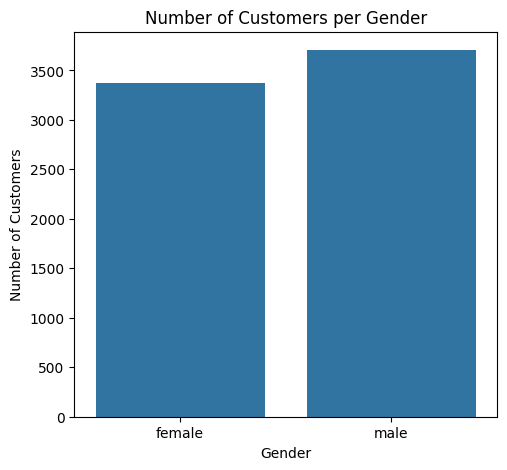

In [14]:
# 1. Customers per gender
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=Credit_Data2,x=Gender, ax=ax1)
plt.title("Number of Customers per Gender")
plt.ylabel("Number of Customers")
# result:males more than females

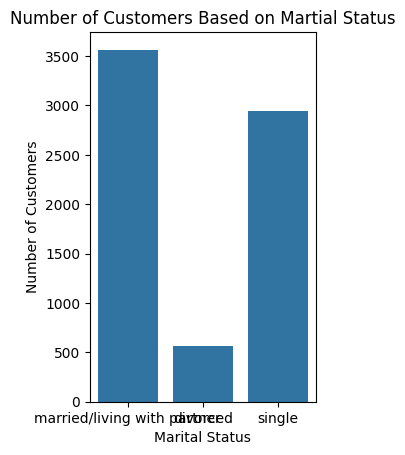

In [15]:

# 2. number of customers per martial status
ax2 = plt.subplot(1,2,2)
sns.countplot(data=Credit_Data2,x=Marital_Status, ax=ax2)
plt.title("Number of Customers Based on Martial Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()
#result : married and single people are in majority

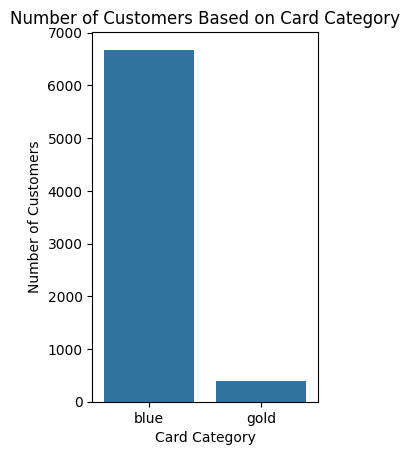

In [16]:
# 3. Customers based on Card Category
ax3=plt.subplot(1,2,1)
sns.countplot(data=Credit_Data2,x=Card_Category, ax=ax3)
plt.title("Number of Customers Based on Card Category")
plt.xlabel("Card Category")
plt.ylabel("Number of Customers")
plt.show()
#Result : Customers with blue card are far more than the gold one

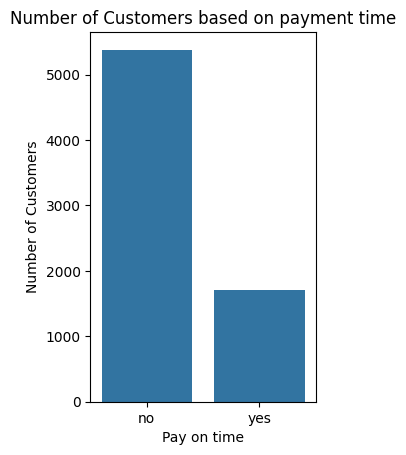

In [17]:
# 4. Customers who pay on time and ones who dont
ax4=plt.subplot(1,2,2)
sns.countplot(data=Credit_Data2,x=Pay_on_time, ax=ax4)
plt.title("Number of Customers based on payment time")
plt.xlabel("Pay on time")
plt.ylabel("Number of Customers")
plt.show()
# most customers do not pay on time

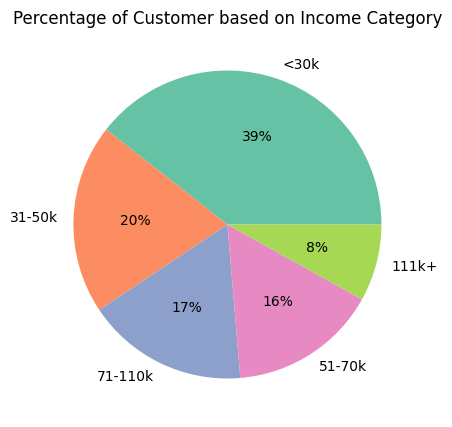

In [19]:
# 5. Income Category
Credit_Data2["Income_Category"].value_counts()
plt.figure(figsize=(12,5))
Income_data=Credit_Data2["Income_Category"].value_counts(normalize=True)
#print(Income_data)
Income_lables=["<30k","31-50k","71-110k","51-70k","111k+"]
plt.pie(Income_data,labels=Income_lables,autopct='%.0f%%',colors=sns.color_palette("Set2"))
plt.title("Percentage of Customer based on Income Category")
plt.show()
# Most People earn less than 30k

count    7080.000000
mean       46.350565
std         8.038155
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: Customer_Age, dtype: float64


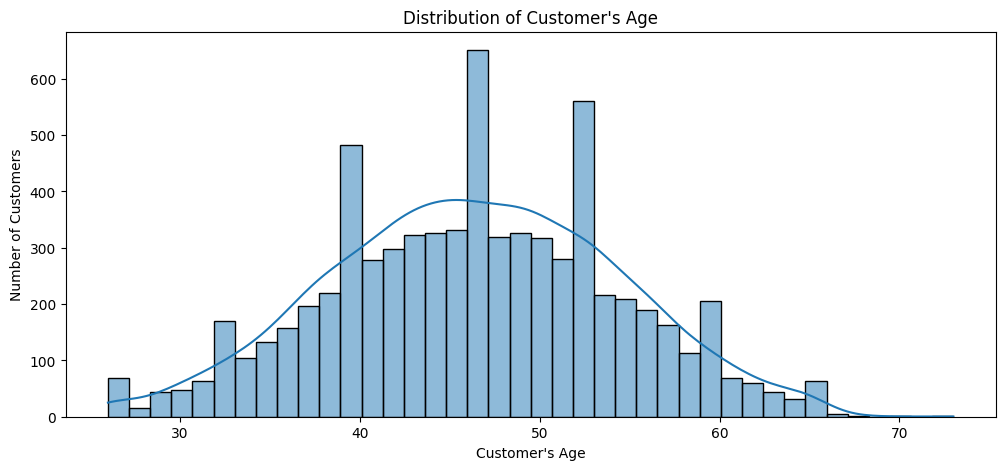

In [21]:
# 6. Customers per Age
print(Credit_Data2["Customer_Age"].describe())
plt.figure(figsize=(12,5))
sns.histplot(data=Credit_Data2,x="Customer_Age",bins=40,kde=True).set(title="Distribution of Customer's Age",ylabel="Number of Customers",xlabel="Customer's Age")
plt.show()
# Mean age was found to be 46.000000

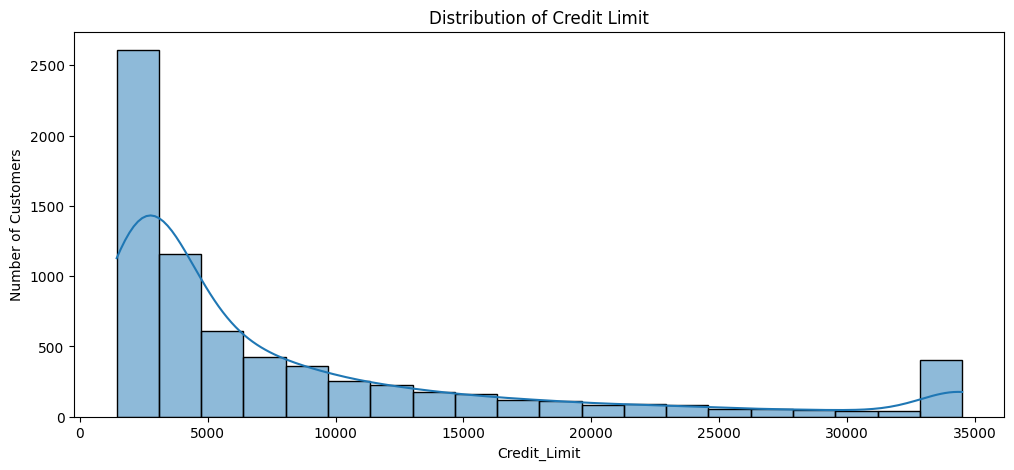

In [22]:
# plotting credit Limit using scatterplot to visualise frequency distribution of numerical data
Credit_Data2["Credit_Limit"].describe()
plt.figure(figsize=(12,5))
sns.histplot(data=Credit_Data2,x="Credit_Limit",bins=20,kde=True).set(title="Distribution of Credit Limit",ylabel="Number of Customers")
plt.show()
# positively skewed

In [25]:
# Investigating more about the customers with credit limit more than 30,000(due to hike in no. of customers)
Credit_Limit_more_than_30k=Credit_Data2[Credit_Data2['Credit_Limit'] > 30000]
Credit_Data2['Card_Category'].value_counts()
print(Credit_Limit_more_than_30k["Income_Category"].value_counts())
print(Credit_Limit_more_than_30k["Gender"].value_counts())
print(Credit_Limit_more_than_30k["Card_Category"].value_counts())
print(Credit_Limit_more_than_30k["Marital_Status"].value_counts())
print(Credit_Limit_more_than_30k["Pay_on_time"].value_counts())

#it is noticed that customer with high credit limit are people which high income category , males and cover major portion of the gold card holders

Income_Category
71 – 110k    228
111k+        188
51 – 70k      61
Name: count, dtype: int64
Gender
male    477
Name: count, dtype: int64
Card_Category
blue    290
gold    187
Name: count, dtype: int64
Marital_Status
single                         239
married/living with partner    195
divorced                        43
Name: count, dtype: int64
Pay_on_time
no     375
yes    102
Name: count, dtype: int64


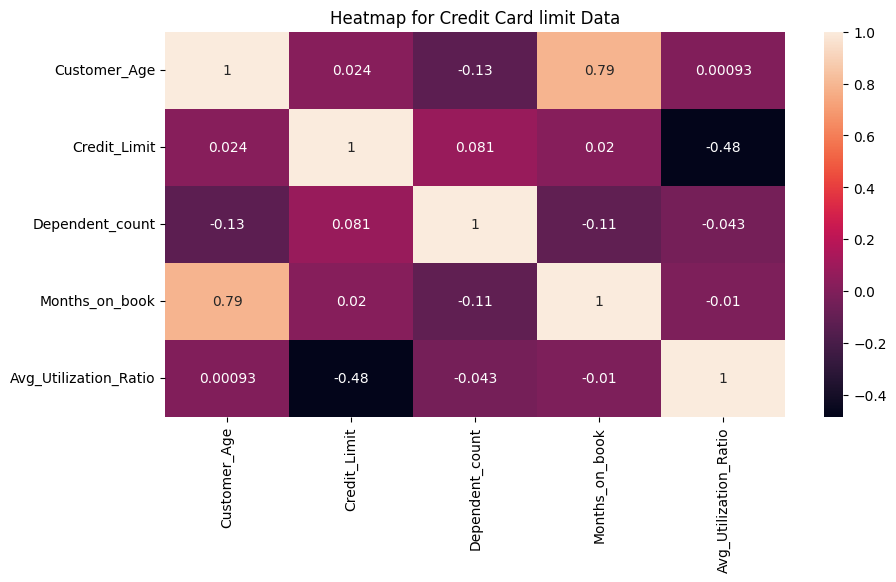

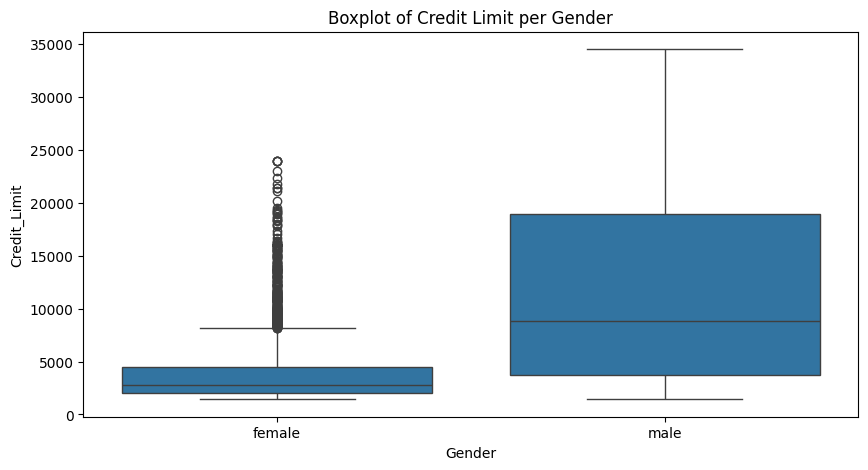

         whishi  whislo       q1     med        q3
Gender                                            
female   8156.0  1438.3  2030.25  2819.0   4489.75
male    34516.0  1438.3  3768.50  8791.0  18916.75


In [27]:
# EDA
# Multivariate Analysis

#1. Correlation Matrix for Numerical Values
corr_df=Credit_Data2[["Customer_Age","Credit_Limit","Dependent_count","Months_on_book","Avg_Utilization_Ratio"]]
corr_df

plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(),annot=True).set(title="Heatmap for Credit Card limit Data")
plt.show()

#noticed a positive high correlation(0.79) exist between the Customer_Age and Months_on_book , Multicollinearity is present between 2 independent variable
#It can also be seen that a negative moderate correlation exists between Avg_utilization ratio and Credit Limit of "-0.48"
#which shows that with the increase in avg_utilization ratio(measure of how often the credit card is used) the Credit Limit for that customer
#decreases moderatly and vice versa.

#2. Categorical vs Numerical Values
#a)Gender and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Gender",y="Credit_Limit").set(title="Boxplot of Credit Limit per Gender")
plt.show()
# from the boxplot above it can be seen that males customers have much higher median credit Limit(8791.0) when compared to
# female customer's median credit limit(2819.0)

gender_credit_limit = Credit_Data2.pivot(columns='Gender', values='Credit_Limit')
# extract the boxplot stats for each gender
gender_credit_limit_stats = [boxplot_stats(gender_credit_limit[col].dropna().values)[0] for col in gender_credit_limit.columns]
#  create a dataframe for the stats for each gender
stats_gender = pd.DataFrame(gender_credit_limit_stats, index=gender_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_gender)

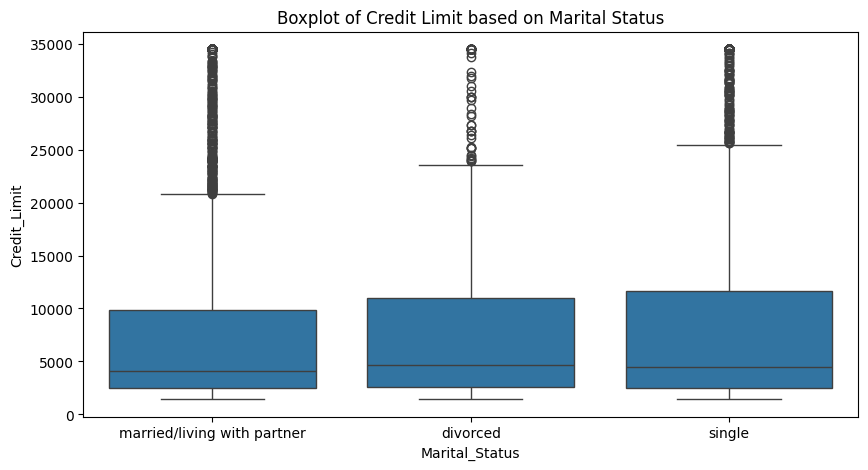

                              whishi  whislo       q1     med        q3
Marital_Status                                                         
divorced                     23603.0  1438.3  2543.00  4701.0  10991.00
married/living with partner  20798.0  1438.3  2494.75  4138.5   9824.25
single                       25410.0  1438.3  2484.50  4511.0  11683.50


In [28]:
#b)Marital Status and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Marital_Status",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Marital Status")
plt.show()
Marital_credit_limit = Credit_Data2.pivot(columns='Marital_Status', values='Credit_Limit')
# extract the boxplot stats based on Marital status
Marital_credit_limit_stats = [boxplot_stats(Marital_credit_limit[col].dropna().values)[0] for col in Marital_credit_limit.columns]
#  create a dataframe for the stats  based on Marital status
stats_Marital = pd.DataFrame(Marital_credit_limit_stats, index=Marital_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Marital)
#The median credit limit difference between customers of different marital status is not huge with the median
#value of single(4511.0),married(4138.5) and divorced(4701.0)

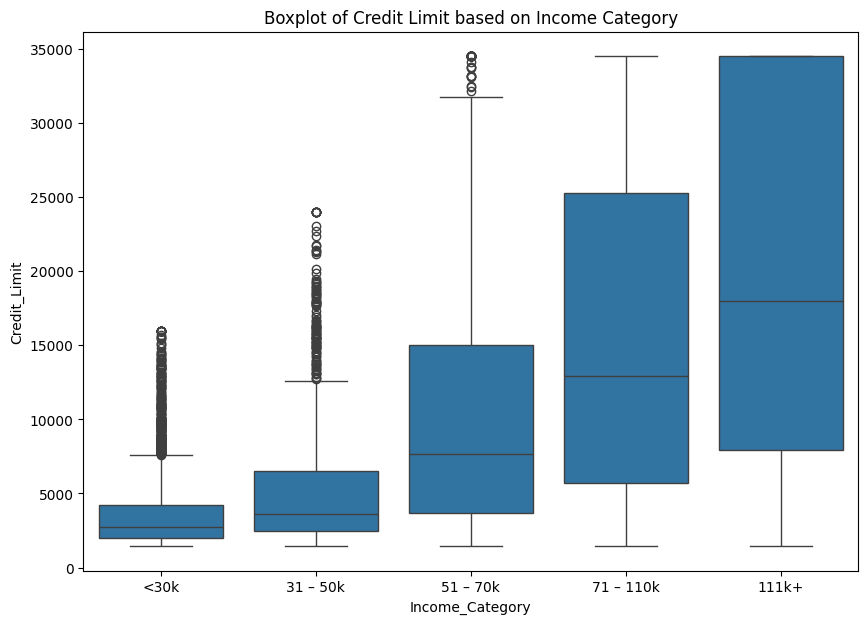

                  whishi  whislo       q1      med       q3
Income_Category                                            
111k+            34516.0  1438.3  7930.00  17966.5  34516.0
31 – 50k         12610.0  1438.3  2433.50   3640.5   6541.5
51 – 70k         31756.0  1438.3  3653.50   7667.0  15035.0
71 – 110k        34516.0  1438.3  5717.75  12939.5  25289.0
<30k              7596.0  1438.3  2016.00   2765.0   4254.5


In [29]:
#c)Income Category and Credit Limit
plt.figure(figsize=(10,7))
sns.boxplot(data=Credit_Data2,x="Income_Category",y="Credit_Limit",order=["<30k","31 – 50k","51 – 70k","71 – 110k","111k+"]).set(title="Boxplot of Credit Limit based on Income Category")
plt.show()
Income_Category_credit_limit = Credit_Data2.pivot(columns='Income_Category', values='Credit_Limit')
# extract the boxplot stats based on Income Category
Income_Category_credit_limit_stats = [boxplot_stats(Income_Category_credit_limit[col].dropna().values)[0] for col in Income_Category_credit_limit.columns]
#  create a dataframe for the stats  based on Income Category
stats_Income_Category = pd.DataFrame(Income_Category_credit_limit_stats, index=Income_Category_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Income_Category)
#It can be seen from the boxplot that with the increase in Income_Category , Credit Limit increases as well.

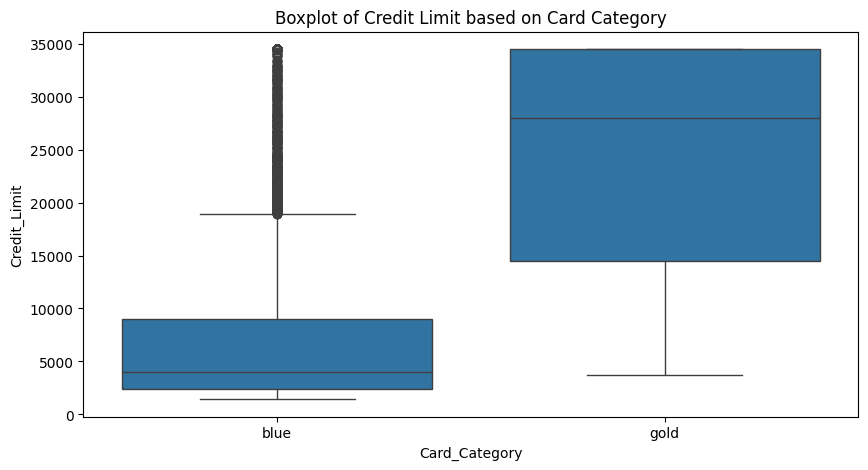

                whishi  whislo        q1      med        q3
Card_Category                                              
blue           18886.0  1438.3   2437.00   3978.5   9028.75
gold           34516.0  3735.0  14452.75  27977.5  34516.00


In [30]:
#d)Card Category and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Card_Category",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Card Category")
plt.show()
Card_Category_credit_limit = Credit_Data2.pivot(columns='Card_Category', values='Credit_Limit')
# extract the boxplot stats based on Card Category
Card_Category_credit_limit_stats = [boxplot_stats(Card_Category_credit_limit[col].dropna().values)[0] for col in Card_Category_credit_limit.columns]
#  create a dataframe for the stats  based on Card Category
stats_Card_Category = pd.DataFrame(Card_Category_credit_limit_stats, index=Card_Category_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Card_Category)
#It can be clearly seen that people with gold card has much higher credit limit(27977.5) than those with blue card(3978.5).

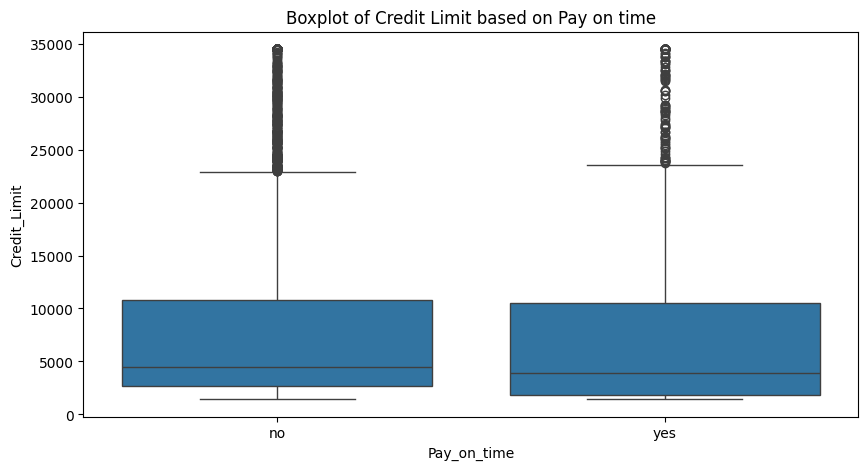

              whishi  whislo      q1     med       q3
Pay_on_time                                          
no           22919.0  1438.3  2628.0  4440.0  10757.0
yes          23603.0  1438.3  1787.0  3933.0  10529.0


In [31]:
#e)Pay_on_time and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Pay_on_time",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Pay on time")
plt.show()
Pay_on_time_credit_limit = Credit_Data2.pivot(columns='Pay_on_time', values='Credit_Limit')
# extract the boxplot stats based on Card Category
Pay_on_time_credit_limit_stats = [boxplot_stats(Pay_on_time_credit_limit[col].dropna().values)[0] for col in Pay_on_time_credit_limit.columns]
#  create a dataframe for the stats  based on Card Category
stats_Pay_on_time = pd.DataFrame(Pay_on_time_credit_limit_stats, index=Pay_on_time_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Pay_on_time)
# no significant difference between median credit limit for customers who pay and who do not pay on time